In [1]:
#Importing Required Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import os
import librosa
import numpy as np
import pandas as pd
import librosa.display
import keras
import IPython.display as ipd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [2]:
#Reading the dataset
audioset_path=(r'C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined')
meta=pd.read_csv(r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\comb_meta\com.csv")
meta.head()

,file_name,fold,class
0,do001.wav,1,cryandsob
1,do002.wav,1,cryandsob
2,do003.wav,1,cryandsob
3,do004.wav,1,cryandsob
4,do005.wav,1,cryandsob


In [3]:
meta['class'].value_counts()

cryandsob    207
screaming    207
Shouting     207
angry        200
disgust      200
fear         200
sad          200
Name: class, dtype: int64

C:\Users\hpmsi\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

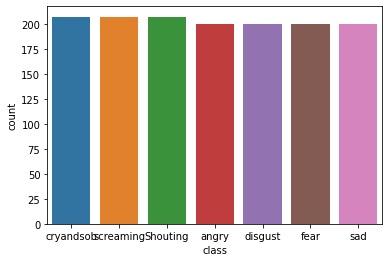

In [4]:
sns.countplot(meta['class'])

In [5]:
#Visualization

In [6]:
def waveplot(data, sr, clas):
    plt.figure(figsize=(10,4))
    plt.title(clas, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, clas):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(clas, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


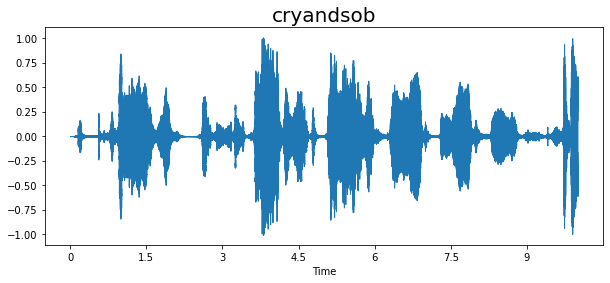

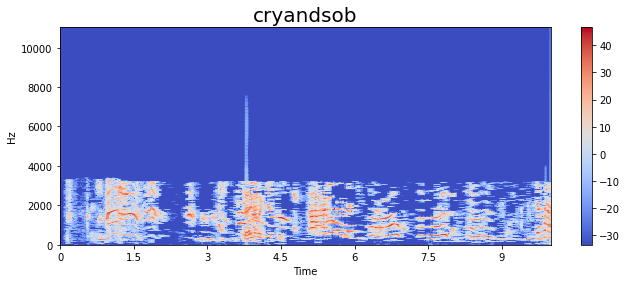

In [7]:
clas= 'cryandsob'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold1\do001.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)



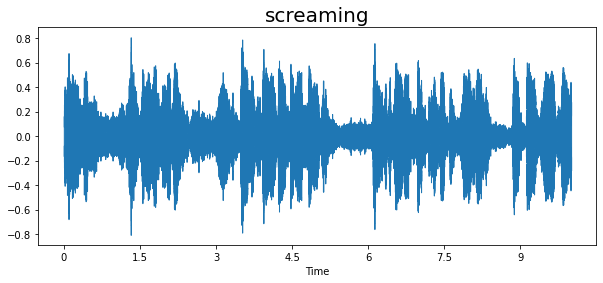

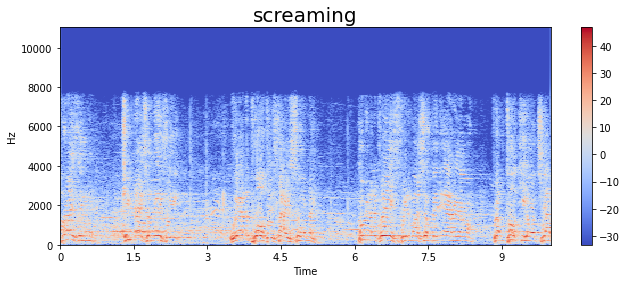

In [8]:
clas= 'screaming'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold2\do429.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)


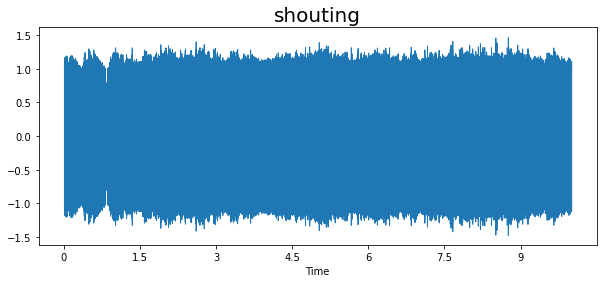

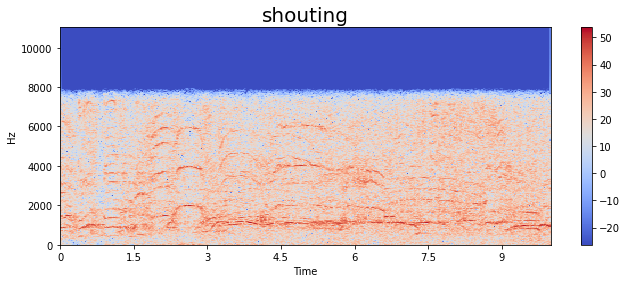

In [9]:
clas= 'shouting'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold3\do900.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)

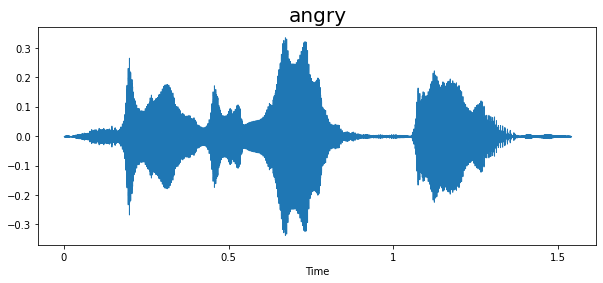

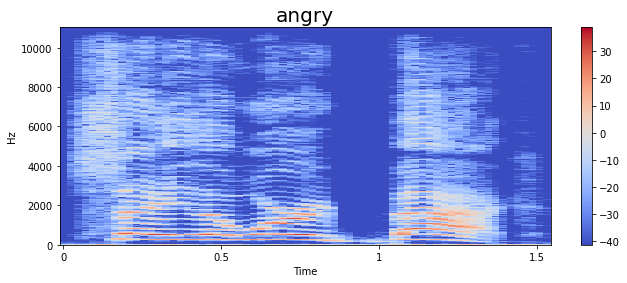

In [10]:
clas= 'angry'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold4\OAF_back_angry.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)

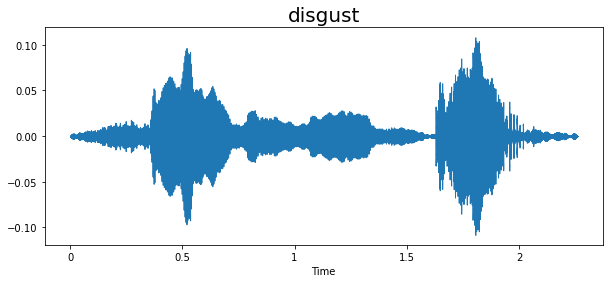

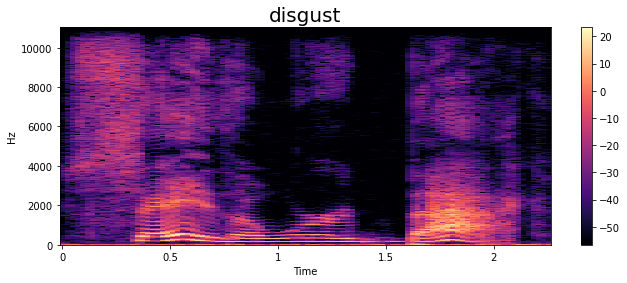

In [11]:
clas= 'disgust'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold5\OAF_back_disgust.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)

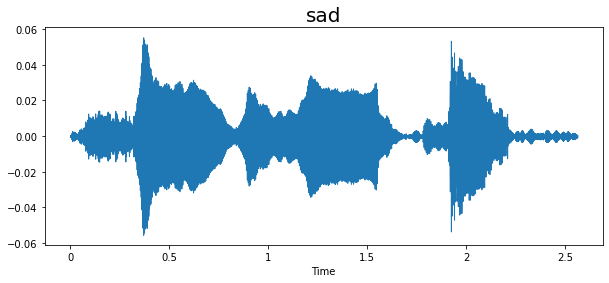

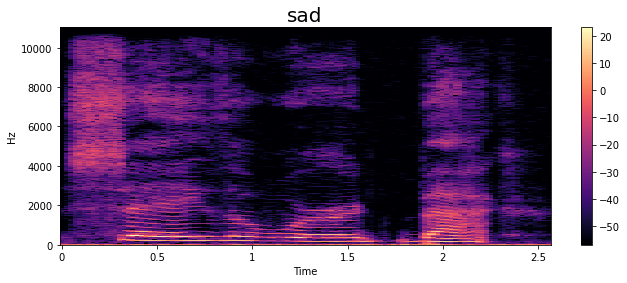

In [12]:
clas= 'sad'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold7\OAF_back_sad.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)

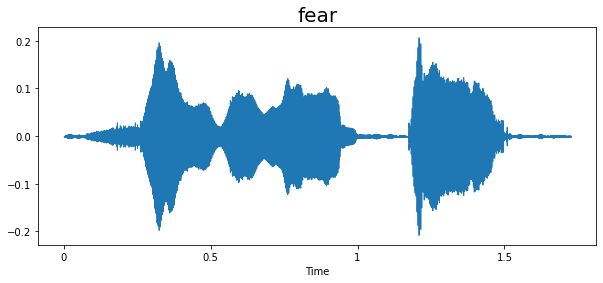

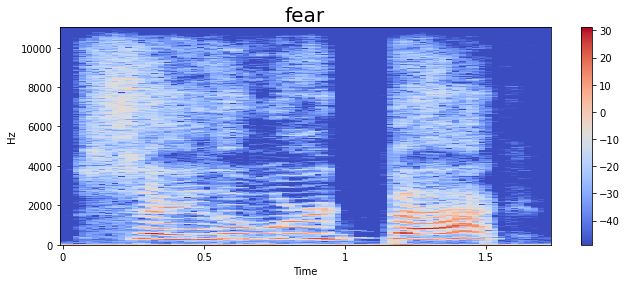

In [13]:
clas= 'fear'
path = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\combined\fold6\OAF_back_fear.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, clas)
spectogram(data, sampling_rate, clas)

In [14]:
#Feature_Extractiom

In [15]:
def features_extractor(file):
    audio, sr = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [16]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_feat=[]
for index_num,row in tqdm(meta.iterrows()):
    file_name = os.path.join(os.path.abspath(audioset_path),'fold'+str(row["fold"])+'/',str(row["file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_feat.append([data,final_class_labels])

1421it [01:30, 15.62it/s]


In [17]:
###  extracted_feat are converted to Pandas dataframe
extracted_feat_df=pd.DataFrame(extracted_feat,columns=['feature','class'])
extracted_feat_df.head()

,feature,class
0,"[-327.12015, 129.83017, -70.920944, -41.29247,...",cryandsob
1,"[-200.72635, 91.268654, -84.3782, 34.001503, -...",cryandsob
2,"[-361.73053, 115.61554, -68.29292, 15.610739, ...",cryandsob
3,"[-349.65146, 137.25008, -59.295837, 28.300783,...",cryandsob
4,"[-433.82852, 111.65828, -27.588154, 6.815115, ...",cryandsob


In [18]:
#Data Preprocessing
##Distributed Data to X and Y
X=np.array(extracted_feat_df['feature'].tolist())
y=np.array(extracted_feat_df['class'].tolist())

In [19]:
y

array(['cryandsob', 'cryandsob', 'cryandsob', ..., 'sad', 'sad', 'sad'],
      dtype='<U9')

In [20]:
#Using Labelencoder to encode the classes to an integer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
labelencoder.fit(y)
y=to_categorical(labelencoder.transform(y))

In [21]:
import pickle
file_name='my_file.pkl'
f = open(file_name,'wb')
pickle. dump(labelencoder,f)
f. close()

In [22]:
# Splitting dara into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#print details of test and train set
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  1136
Number of testing samples =  285


In [23]:
### No of classes
num_labels=y.shape[1]
print(num_labels)

7


In [24]:
#Building the model
##constructing the model
ANNmodel=Sequential()
ANNmodel.add(Dense(100,input_shape=(40,)))
ANNmodel.add(Activation('relu'))
ANNmodel.add(Dropout(0.5))
ANNmodel.add(Dense(200))
ANNmodel.add(Activation('relu'))
ANNmodel.add(Dropout(0.5))
ANNmodel.add(Dense(100))
ANNmodel.add(Activation('relu'))
ANNmodel.add(Dropout(0.5))
ANNmodel.add(Dense(num_labels))
ANNmodel.add(Activation('softmax'))

In [25]:
ANNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [26]:
#Compiling the model
ANNmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [41]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 250
num_batch_size = 32
#t = time.time()
# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
#                                verbose=1, save_best_only=True)
start = datetime.now()

ANN_result=ANNmodel.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9569 - val_loss: 0.8321 - val_accuracy: 0.8246
Epoch 2/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9516 - val_loss: 0.9078 - val_accuracy: 0.8211
Epoch 3/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9410 - val_loss: 0.8087 - val_accuracy: 0.8175
Epoch 4/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.9533 - val_loss: 0.7984 - val_accuracy: 0.8211
Epoch 5/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9481 - val_loss: 0.8282 - val_accuracy: 0.8351
Epoch 6/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9533 - val_loss: 0.9453 - val_accuracy: 0.8140
Epoch 7/250
36/36 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9516 - val_loss: 1.0018 - val_accuracy: 0.8105
Epoch 8/250
3

36/36 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9560 - val_loss: 0.8110 - val_accuracy: 0.8246
Epoch 59/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1420 - accuracy: 0.9463 - val_loss: 0.7732 - val_accuracy: 0.8246
Epoch 60/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9595 - val_loss: 0.7720 - val_accuracy: 0.8281
Epoch 61/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9560 - val_loss: 0.8382 - val_accuracy: 0.8246
Epoch 62/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.9525 - val_loss: 0.7853 - val_accuracy: 0.8316
Epoch 63/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9577 - val_loss: 0.7987 - val_accuracy: 0.8316
Epoch 64/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9542 - val_loss: 0.8698 - val_accuracy: 0.8246
Epoch 65/250
36/36 

Epoch 116/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9428 - val_loss: 0.9222 - val_accuracy: 0.8246
Epoch 117/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9613 - val_loss: 0.9077 - val_accuracy: 0.8211
Epoch 118/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.9498 - val_loss: 0.8160 - val_accuracy: 0.8316
Epoch 119/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9560 - val_loss: 0.8270 - val_accuracy: 0.8316
Epoch 120/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9516 - val_loss: 0.8679 - val_accuracy: 0.8246
Epoch 121/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9569 - val_loss: 1.0018 - val_accuracy: 0.8211
Epoch 122/250
36/36 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9595 - val_loss: 0.9493 - val_accuracy: 0.8211

36/36 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9481 - val_loss: 0.9337 - val_accuracy: 0.8281
Epoch 174/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.9613 - val_loss: 0.9685 - val_accuracy: 0.8281
Epoch 175/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9560 - val_loss: 0.9747 - val_accuracy: 0.8316
Epoch 176/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9577 - val_loss: 0.8949 - val_accuracy: 0.8140
Epoch 177/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9463 - val_loss: 0.8334 - val_accuracy: 0.8351
Epoch 178/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9419 - val_loss: 0.8764 - val_accuracy: 0.8281
Epoch 179/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9560 - val_loss: 0.9430 - val_accuracy: 0.8386
Epoch 180/250

36/36 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9621 - val_loss: 0.9899 - val_accuracy: 0.8211
Epoch 231/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9604 - val_loss: 1.0284 - val_accuracy: 0.8105
Epoch 232/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9410 - val_loss: 0.9526 - val_accuracy: 0.8281
Epoch 233/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1339 - accuracy: 0.9577 - val_loss: 1.0382 - val_accuracy: 0.8070
Epoch 234/250
36/36 [==============================] - 0s 4ms/step - loss: 0.1206 - accuracy: 0.9586 - val_loss: 0.9953 - val_accuracy: 0.8140
Epoch 235/250
36/36 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 0.9569 - val_loss: 1.1122 - val_accuracy: 0.8175
Epoch 236/250
36/36 [==============================] - 0s 3ms/step - loss: 0.1261 - accuracy: 0.9551 - val_loss: 1.0827 - val_accuracy: 0.8351
Epoch 237/250

In [42]:
test_accuracy=ANNmodel.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8245614171028137


In [38]:
X_test[1]

array([-1.3063849e+02,  1.1165551e+02, -8.7104301e+01,  5.8447609e+01,
       -4.3384937e+01,  2.9110548e+01, -1.6375883e+01,  2.3683420e+01,
       -4.0308213e+00, -7.6600137e+00,  1.0622702e+01, -1.4019006e+01,
        1.2874228e+01, -4.9438267e+00,  8.0033770e+00, -5.4981914e+00,
        9.6272564e+00, -5.0295973e-01, -2.7353075e+00,  6.3974915e+00,
       -3.7514639e+00,  3.1424506e+00, -6.9262648e+00,  6.9378138e-02,
       -5.4487967e+00,  1.1041200e+00, -2.0198722e+00, -2.2589972e+00,
       -4.1758195e-01, -3.9879074e+00, -8.0276453e-01, -1.3649640e+00,
        5.1823225e+00, -1.9565439e+00, -1.1405403e-01, -1.8208673e+00,
       -3.9585388e-01, -5.8239591e-01, -1.7330813e+00, -1.6288793e-01],
      dtype=float32)

In [39]:
ANNmodel.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 6, 5, 5, 2, 1, 5, 1, 1, 6, 4, 3, 0, 6, 2, 5, 2, 1, 3, 5, 5, 1,
       5, 3, 5, 0, 3, 6, 4, 5, 0, 4, 6, 1, 4, 3, 0, 6, 2, 4, 6, 2, 5, 4,
       5, 1, 3, 4, 4, 6, 1, 2, 5, 6, 2, 2, 0, 0, 2, 0, 2, 4, 1, 2, 6, 6,
       6, 1, 0, 4, 6, 6, 2, 5, 4, 6, 0, 3, 0, 6, 5, 3, 4, 4, 6, 3, 2, 6,
       5, 3, 2, 3, 1, 3, 1, 6, 6, 6, 1, 3, 2, 5, 4, 3, 6, 5, 5, 3, 1, 4,
       6, 0, 2, 2, 2, 3, 5, 3, 0, 6, 2, 4, 4, 6, 3, 1, 4, 6, 3, 1, 6, 2,
       4, 2, 0, 2, 1, 4, 0, 3, 3, 0, 2, 6, 5, 4, 0, 5, 5, 6, 6, 1, 5, 0,
       4, 5, 3, 2, 5, 5, 2, 2, 2, 6, 0, 0, 0, 5, 4, 1, 5, 2, 1, 4, 5, 6,
       0, 0, 3, 2, 2, 0, 6, 5, 1, 2, 0, 2, 6, 4, 6, 5, 3, 6, 0, 5, 4, 1,
       4, 0, 6, 5, 0, 6, 4, 6, 6, 6, 5, 6, 5, 5, 0, 6, 1, 4, 1, 2, 2, 5,
       5, 1, 6, 5, 5, 1, 4, 3, 6, 6, 3, 2, 6, 4, 0, 3, 2, 3, 6, 6, 0, 3,
       3, 4, 2, 4, 6, 5, 6, 4, 3, 3, 2, 3, 2, 0, 5, 1, 6, 0, 6, 0, 2, 2,
       2, 1, 5, 5, 3, 1, 3, 5, 6, 5, 6, 5, 1, 1, 2, 6, 6, 4, 6, 6, 3],
      dtype=int64)

In [40]:
filename=r"C:\Users\hpmsi\Downloads\132106__sironboy__woman-scream (1).wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
predicted_label=ANNmodel.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print("The predicted class is",prediction_class)

[6]
The predicted class is ['screaming']
